In [ ]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'Income','Spending Score (1-100)':'Score'} ,inplace=True) #inplace=True is not mandatory.

In [ ]:
df.head()

,CustomerID,gender,age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,CustomerID,age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


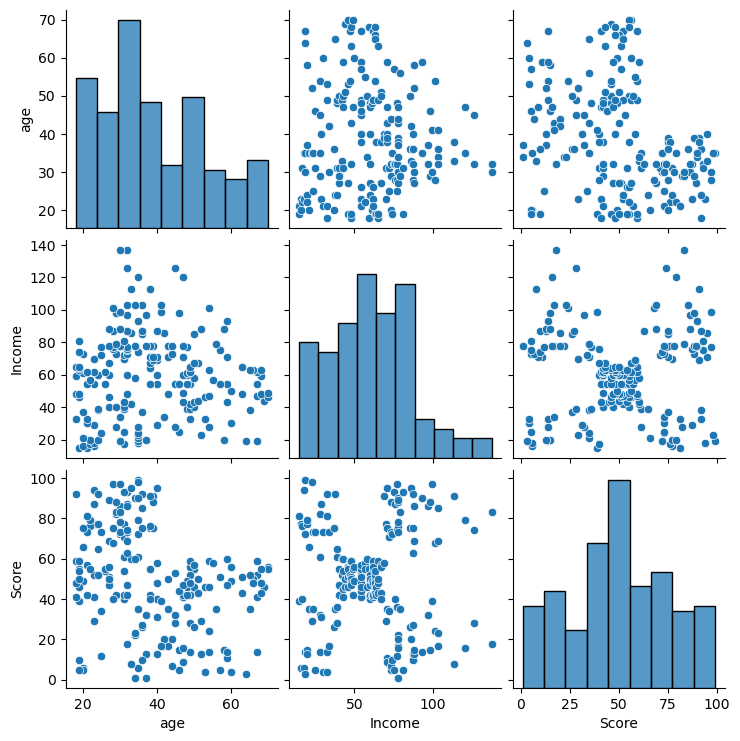

In [ ]:
seaborn.pairplot(df[['age','Income','Score']])

In [ ]:
import sklearn.cluster as cluster

In [ ]:
model = cluster.KMeans(n_clusters=5)

In [ ]:
model = model.fit(df[['Income','Score']])

In [ ]:
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

In [ ]:
df['income_clusters'] = model.labels_

In [ ]:
df

,CustomerID,gender,age,Income,Score,income_clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [ ]:
df['income_clusters'].value_counts()

4    81
0    39
2    35
1    23
3    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Score'>

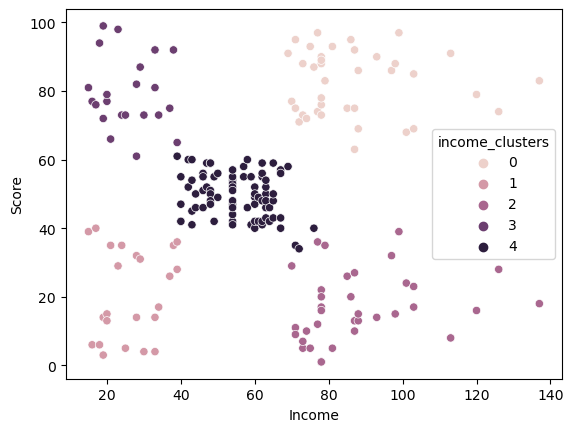

In [ ]:
seaborn.scatterplot(x='Income', y='Score', hue='income_clusters',data=df)

In [ ]:
model = cluster.KMeans(n_clusters=2)

In [ ]:
model = model.fit(df[['age','Score']])

In [ ]:
model.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [ ]:
df['age_clusters'] = model.labels_

In [ ]:
df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Score'>

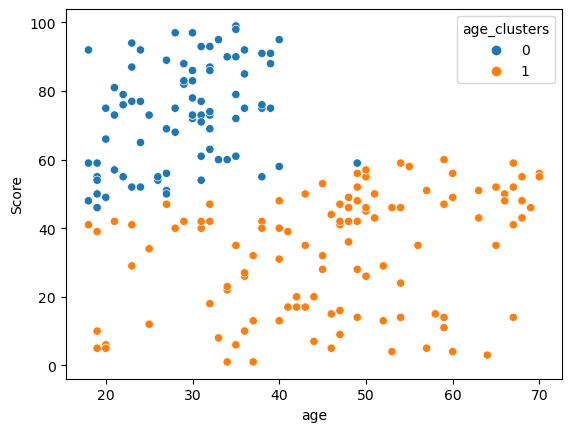

In [ ]:
seaborn.scatterplot(x='age', y='Score', hue='age_clusters',data=df)

# Elbow Method in K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_range = range(1, 12)
wcss = []

In [ ]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Income','Score']])
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 31924.238906926403,
 25018.576334776335,
 21841.97825674864,
 19746.911957660894,
 17587.14631879711]

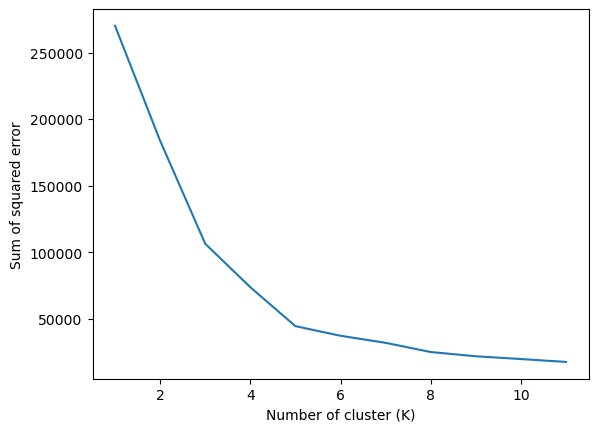

In [ ]:
plt.xlabel('Number of cluster (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)
plt.show()

In [ ]:
#This Elbow Method in K-Means Clustering we can also apply for 'age', 'Income'